# Projeto Visualização de dados de Resíduos Reciclados no Brasil

Este projeto foi desenvolvido por [Gustavo Lins](https://github.com/gnlins/Projeto_reciclaveis) com a intenção de aprimorar seus conhecimentos em análise de dados. 

O Dataset utilizado  foi o da relação das pessoas jurídicas que entregaram o Relatório de Atividades Potencialmente Poluidoras (RAPP) referente ao formulário Produtos Reciclados.

Esse formulário esteve em vigência entre os anos 2006 e 2013 e recolhe informações sobre Produtos Reciclados – tais como:
- tratamento e destinação de resíduos industriais líquidos e sólidos; 
- disposição de resíduos especiais;
- destinação de resíduos de esgotos sanitários e de resíduos sólidos urbanos, inclusive aqueles provenientes de fossas; 
- tratamento e destinação de resíduos industriais líquidos e sólidos; 
- destinação de pilhas e baterias.

Dataset está disponível [aqui](http://www.dados.gov.br/dataset/produtos-reciclados/resource/72a96394-72f9-4d19-ac5a-ab28bbfab2e2?inner_span=True).

[Mais dúvidas](http://www.simepetro.com.br/wp-content/uploads/ibama-guia.pdf)

# 1. Importando bibliotecas e acessando o Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'http://dadosabertos.ibama.gov.br/dados/RAPP/produtosReciclados/relatorio.csv'
rel = pd.read_csv(url, sep=';')

In [65]:
rel.head(1)

,CNPJ,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo,Situação Cadastral,UF
0,00.024.376/0001-36,IDEAL COMERCIO DE TAMBORES LTDA,SAO PAULO,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,1,kilogramas,40.263.170/0008-50 - ESSENCIS SOLUÇÕES AMBIENT...,Ativa,SP


In [10]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23161 entries, 0 to 23160
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CNPJ                            23161 non-null  object
 1   Razão Social                    23161 non-null  object
 2   Estado                          23161 non-null  object
 3   Município                       23161 non-null  object
 4   Ano                             23161 non-null  int64 
 5   Tipo de Resíduo                 23161 non-null  object
 6   Método de Reciclagem            23161 non-null  object
 7   Quantidade                      23161 non-null  object
 8   Unidade de Medida               23161 non-null  object
 9   Empresa Destinadora do Resíduo  23161 non-null  object
 10  Situação Cadastral              23161 non-null  object
 11  UF                              4571 non-null   object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


In [18]:
UF_dict = {
    'AC': 'ACRE',
    'AL': 'ALAGOAS',
    'AP': 'AMAPA',
    'AM': 'AMAZONAS',
    'BA': 'BAHIA',
    'CE': 'CEARA',
    'DF': 'DISTRITO FEDERAL',
    'ES': 'ESPIRITO SANTO',
    'GO': 'GOIAS',
    'MA': 'MARANHAO',
    'MT': 'MATO GROSSO',
    'MS': 'MATO GROSSO DO SUL',
    'MG': 'MINAS GERAIS',
    'PA': 'PARA',
    'PB': 'PARAIBA',
    'PR': 'PARANA',
    'PE': 'PERNAMBUCO',
    'PI': 'PIAUI',
    'RJ': 'RIO DE JANEIRO',
    'RN': 'RIO GRANDE DO NORTE',
    'RS': 'RIO GRANDE DO SUL',
    'RO': 'RONDONIA',
    'RR': 'RORAIMA',
    'SC': 'SANTA CATARINA',
    'SP': 'SAO PAULO',
    'SE': 'SERGIPE',
    'TO': 'TOCANTINS'
}

In [19]:
estados = list(map(lambda x: x.lower(), list(UF_dict.values())))

def creatorUF(x):
    #a = x.capitalize()
    #print(a)
    for UF, estado in  UF_dict.items():
        if estado == x:
            return UF
        
rel['UF']= list(map(lambda x: creatorUF(x),rel['Estado']))

In [20]:
rel[rel['Estado']=='RIO DE JANEIRO']

,CNPJ,Razão Social,Estado,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,Empresa Destinadora do Resíduo,Situação Cadastral,UF
441,00.417.391/0001-44,AMBICONTROL SERVIÇOS E REPRESENTAÇÕES LTDA.,RIO DE JANEIRO,DUQUE DE CAXIAS,2003,Óleo lubrificante usado,Outros,50,Litro,46.201.083/0011-50 - LWART LUBRIFICANTES LTDA,Ativa,RJ
442,00.417.391/0001-44,AMBICONTROL SERVIÇOS E REPRESENTAÇÕES LTDA.,RIO DE JANEIRO,DUQUE DE CAXIAS,2006,Óleo lubrificante usado,Outros,55,Litro,28.166.072/0001-22 - RESIPETROL LTDA.,Ativa,RJ
443,00.417.391/0001-44,AMBICONTROL SERVIÇOS E REPRESENTAÇÕES LTDA.,RIO DE JANEIRO,DUQUE DE CAXIAS,2011,Óleo lubrificante usado,Outros,60,Litro,17.195.231/0002-81 - PETROLUB INDUSTRIAL DE LU...,Ativa,RJ
645,00.835.301/0006-40,BALL EMBALAGENS LTDA,RIO DE JANEIRO,TRES RIOS,2010,"Resíduo de madeira (restos de embalagens, pall...",Outros,5.040,kilogramas,07.125.452/0001-49 - INOVA AMBIENTAL ASSESSORI...,Ativa,RJ
646,00.835.301/0006-40,BALL EMBALAGENS LTDA,RIO DE JANEIRO,TRES RIOS,2010,Resíduo de papel e papelão,Outros,20.060,kilogramas,07.125.452/0001-49 - INOVA AMBIENTAL ASSESSORI...,Ativa,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
23105,96.824.594/0073-07,Votorantim Cimentos Brasil S.A,RIO DE JANEIRO,CANTAGALO,2009,Resíduo de papel e papelão,Outros,6.690,kilogramas,28.645.794/0001-60 - PREF MUN DE CANTAGALO,Cadastramento indevido,RJ
23106,96.824.594/0073-07,Votorantim Cimentos Brasil S.A,RIO DE JANEIRO,CANTAGALO,2009,Resíduo de refratários e materiais não cerâmicos,Outros,410,kilogramas,96.824.594/0073-07 - Votorantim Cimentos Brasi...,Cadastramento indevido,RJ
23107,96.824.594/0073-07,Votorantim Cimentos Brasil S.A,RIO DE JANEIRO,CANTAGALO,2009,Resíduo de restaurante(restos de alimentos),Compostagem,43.830,kilogramas,28.645.794/0001-60 - PREF MUN DE CANTAGALO,Cadastramento indevido,RJ
23108,96.824.594/0073-07,Votorantim Cimentos Brasil S.A,RIO DE JANEIRO,CANTAGALO,2009,Resíduo plástico(filmes e pequenas embalagens),Outros,3.930,kilogramas,28.645.794/0001-60 - PREF MUN DE CANTAGALO,Cadastramento indevido,RJ


In [17]:
rel['Estado'].unique()

array(['SAO PAULO', 'SANTA CATARINA', 'PARANA', 'MARANHAO', 'GOIAS',
       'DISTRITO FEDERAL', 'MATO GROSSO DO SUL', 'MINAS GERAIS', 'CEARA',
       'RIO DE JANEIRO', 'ESPIRITO SANTO', 'PARAIBA', 'MATO GROSSO',
       'TOCANTINS', 'BAHIA', 'AMAZONAS', 'RIO GRANDE DO SUL', 'PARA',
       'RONDONIA', 'PERNAMBUCO', 'ALAGOAS', 'SERGIPE', 'PIAUI',
       'RIO GRANDE DO NORTE'], dtype=object)

In [23]:
rel.columns

Index(['CNPJ', 'Razão Social', 'Estado', 'Município', 'Ano', 'Tipo de Resíduo',
       'Método de Reciclagem', 'Quantidade', 'Unidade de Medida',
       'Empresa Destinadora do Resíduo', 'Situação Cadastral', 'UF'],
      dtype='object')

In [36]:
rel_enxuto = rel.drop(['CNPJ','Estado','Situação Cadastral', 'Empresa Destinadora do Resíduo'], axis=1)

In [37]:
rel_enxuto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23161 entries, 0 to 23160
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Razão Social          23161 non-null  object
 1   Município             23161 non-null  object
 2   Ano                   23161 non-null  int64 
 3   Tipo de Resíduo       23161 non-null  object
 4   Método de Reciclagem  23161 non-null  object
 5   Quantidade            23161 non-null  object
 6   Unidade de Medida     23161 non-null  object
 7   UF                    23161 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


# 2. Explorando e conhecendo os dados

In [38]:
rel_enxuto.head(2)

,Razão Social,Município,Ano,Tipo de Resíduo,Método de Reciclagem,Quantidade,Unidade de Medida,UF
0,IDEAL COMERCIO DE TAMBORES LTDA,GUARULHOS,2004,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,1,kilogramas,SP
1,IDEAL COMERCIO DE TAMBORES LTDA,GUARULHOS,2010,"Resíduo inflamável (resinas, etc)",Queima em formos industriais,72,Ton. por ano,SP


In [39]:
rel_enxuto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23161 entries, 0 to 23160
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Razão Social          23161 non-null  object
 1   Município             23161 non-null  object
 2   Ano                   23161 non-null  int64 
 3   Tipo de Resíduo       23161 non-null  object
 4   Método de Reciclagem  23161 non-null  object
 5   Quantidade            23161 non-null  object
 6   Unidade de Medida     23161 non-null  object
 7   UF                    23161 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


<h5>Acima podemos conferir que a única informação numérica é o ano. A coluna de 'Quantidade', que também é preenchida por números, está como texto (já temos algo que precisará de nossa atenção). Explorando os dados, percebi que o separador de milhar '.', não permitiu que o número fosse reconhecido. Então utilizei a seguinte função para criar uma coluna com valores numéricos das quantidades.<h5/>

In [43]:
rel_enxuto['Unidade de Medida'].unique()

array(['kilogramas', 'Ton. por ano', 'Unidade', 'Litro',
       'Grama por Kilograma', 'Tonelada', 'Metro Cúbico', 'Folha',
       'Milheiro', 'Frasco', 'Peça', 'Orquidário', 'Dia',
       'Litro por 100 Kilos', 'Unidade Reestruturada', 'Caixa',
       'Kg por covo dia de mar', 'Tonelada por metro cúbico',
       'Metro Cúbico/ha', 'Galão', 'Kg por barco ano', 'Carcassa',
       'Quilometro', 'Litro por Metro Cúbico', 'Livro', 'Lata', 'Rolo',
       'Metro', 'Kilograma por 100 Kilos', 'Anuário', 'Grama', 'Espécie',
       'Km² por ano', 'Amostra', 'Embarcação', 'Kilograma/ha', 'Litro/ha',
       'Tora', 'Estéreo', 'Gigawatthora', 'Estéreo/ha', 'Grama por Litro',
       'Estirpe', 'Exemplar', 'Hectare', 'Grama por Metro Cúbico', 'Tubo'],
      dtype=object)

In [64]:
rel_enxuto['Quantidade'].unique()

array(['1', '72', '111', ..., '5.295', '3.220', '1.511'], dtype=object)

In [ ]:
rel_enxuto[]

In [68]:
resType = pd.DataFrame(rel_enxuto['Tipo de Resíduo'].value_counts())

In [77]:
pd.set_option('display.max_rows',120)

In [78]:
resType

,Tipo de Resíduo
Outros resíduos perigosos de processo,2032
Outros,1944
Resíduo de papel e papelão,1816
Sucata de metais ferrosos,1777
Pneus inserviveis/reciclados outras aplicações,1483
Lämpadas fluorescentes (vapor de mercúrio ou sódio),1134
Resíduo plástico(filmes e pequenas embalagens),1051
Material contaminado com óleo,942
"Sucata de metais não ferrosos (latão, etc.)",904
Outros resíduos não perigosos,740


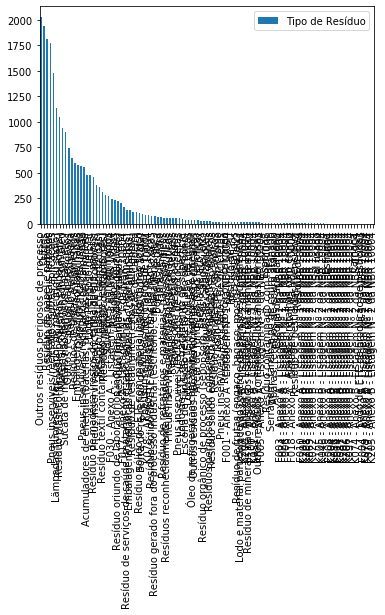

In [83]:
resType.plot(kind='bar')

In [ ]:
def converter(x):
    l = x.split('.')
    if len(l)>1:
        for i, e in enumerate(l):
            a = l[i-1]+e
    else:
        a=l[0]
    return a
rel['Qtde_numero'] = list(map(lambda x: converter(x),rel['Quantidade']))
rel['Qtde_numero'] = list(map(lambda x: float(x), rel['Qtde_numero']))
rel.head(1)

In [ ]:
rel.info()

In [ ]:
rel['Estado'].nunique()

In [ ]:
rel[rel['Tipo de Resíduo']=='Óleo lubrificante usado']

In [ ]:
rel['Unidade de Medida'].nunique()

In [ ]:
rel['Método de Reciclagem'].nunique()

In [ ]:
rel['Situação Cadastral'].nunique()

# 3. Limpando os dados
Aqui vamos retirar as informações que não são do nosso interesse.

In [ ]:
rel.drop(['CNPJ','Quantidade', 'Razão Social', 'Empresa Destinadora do Resíduo', 'Situação Cadastral'], axis=1)

In [ ]:
rel.head(1)

In [40]:
plt.figure(figsize=(16,8))
chart=sns.barplot(x=rel[rel['Tipo de Resíduo']=='Óleo lubrificante usado']['Estado'], y=rel[rel['Tipo de Resíduo']=='Óleo lubrificante usado']['Qtde_numero'], ci=None)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

KeyError: 'Qtde_numero'

<Figure size 1152x576 with 0 Axes>